In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target
features = iris.feature_names
target_names = iris.target_names
colors = ["red", "green", "blue"]

In [3]:
print(features)
print(target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


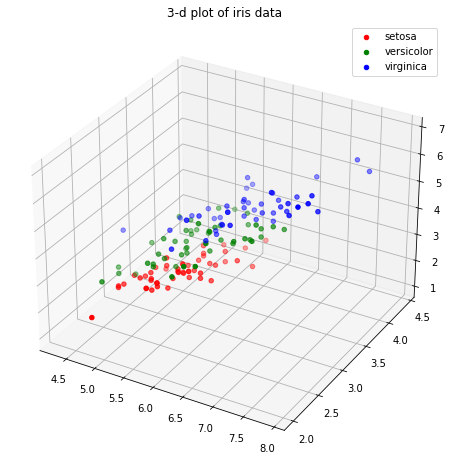

In [13]:
# Plotting  iris data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("3-d plot of iris data")
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    ax.scatter(X[y == i, 0], X[y == i, 1], X[y == i, 2], color = color, label = target_name)
plt.legend()
plt.show()

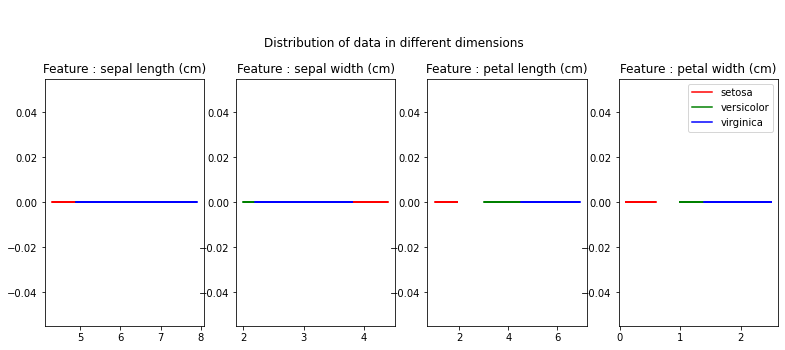

In [16]:
# checking on different attributes
fig = plt.figure(figsize=(20,10))
fig.suptitle("\n\nDistribution of data in different dimensions")

for j in range(4):
    ax = fig.add_subplot(2, 6, 2+j+(j>3))
    for color, i, target_name in zip(colors, [0, 1, 2], target_names):
        ax.set_title("Feature : %s" %(features[j]))
        ax.plot(X[y == i, j], np.zeros_like(X[y == i, j]), color = color, label = target_name)
plt.legend()
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [22]:
tree = DecisionTreeClassifier(criterion = "entropy")
tree.fit(X_train, y_train)
accuracy = tree.score(X_test, y_test)
print("Accuracy without LDA: ", accuracy)

Accuracy without LDA:  0.9333333333333333


In [23]:
lda1 = LinearDiscriminantAnalysis(n_components = 1)
lda2 = LinearDiscriminantAnalysis(n_components = 2)

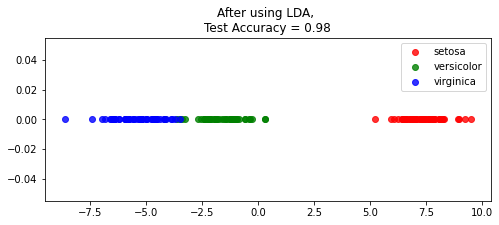

In [29]:
# Accuracy after using LDA for data in 1D
lda1.fit(X_train, y_train)

tree.fit(lda1.transform(X_train), y_train)

accuracy = tree.score(lda1.transform(X_test), y_test)
X_1 = lda1.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_1[y == i, 0], np.zeros_like(X[y == i, j]), alpha= .8, color = color, label = target_name)
plt.legend()
plt.title("After using LDA, \nTest Accuracy = {:.2f}".format(accuracy))
plt.show()

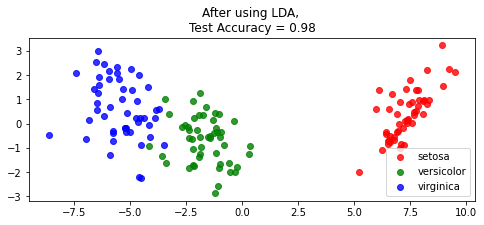

In [33]:
# Accuracy after using LDA for data in 2D
lda2.fit(X_train, y_train)

tree.fit(lda2.transform(X_train), y_train)

accuracy = tree.score(lda2.transform(X_test), y_test)
X_2 = lda2.transform(X)
plt.figure(figsize=(8,3))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_2[y == i, 0], X_2[y == i, 1], alpha= .8, color = color, label = target_name)
plt.legend()
plt.title("After using LDA, \nTest Accuracy = {:.2f}".format(accuracy))
plt.show()